# COGS 118B - Data Wrangling

# Names


- Ana Maria Baboescu
- Bradley Grace
- Fatima Enriquez
- Ngoc (Lucy) Giang
- Stephanie Frianeza

# Imported Libraries
Feel free to add any necessary libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# FMA - Bradley
Below code displays the updated dataset with the wanted variables

In [2]:
# https://github.com/mdeff/fma

# Import dataframes from CSV files
#fma_tracks = pd.read_csv('datasets/fma/tracks.csv') # per track metadata such as ID, title, artist, genres, tags and play counts, for all 106,574 tracks.
fma_genres = pd.read_csv('datasets/fma/genres.csv') # all 163 genres with name and parent
#fma_features1 = pd.read_csv('datasets/fma/features.csv') # common features extracted with librosa
fma_features2 = pd.read_csv('datasets/fma/echonest.csv') # audio features provided by Echonest (now Spotify)

#fma_tracks.shape, 
fma_genres.shape, 
#fma_features1.shape, 
fma_features2.shape

/tmp/ipykernel_955/1612972013.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types. Specify dtype option on import or set low_memo

(13132, 250)

In [3]:
# Import the split dataset CSVs 

fma_tracks1 = pd.read_csv('datasets/fma/tracks-1.csv')
fma_tracks2 = pd.read_csv('datasets/fma/tracks-2.csv')
fma_tracks3 = pd.read_csv('datasets/fma/tracks-3.csv')
fma_tracks4 = pd.read_csv('datasets/fma/tracks-4.csv')
fma_tracks5 = pd.read_csv('datasets/fma/tracks-5.csv')
fma_tracks6 = pd.read_csv('datasets/fma/tracks-6.csv')

fma_tracks = pd.concat([fma_tracks1, fma_tracks2, fma_tracks3, fma_tracks4, fma_tracks5, fma_tracks6], ignore_index=True)

fma_features1_1 = pd.read_csv('datasets/fma/features-1.csv')
fma_features1_2 = pd.read_csv('datasets/fma/features-2.csv')
fma_features1_3 = pd.read_csv('datasets/fma/features-3.csv')
fma_features1_4 = pd.read_csv('datasets/fma/features-4.csv')
fma_features1_5 = pd.read_csv('datasets/fma/features-5.csv')
fma_features1_6 = pd.read_csv('datasets/fma/features-6.csv')
fma_features1_7 = pd.read_csv('datasets/fma/features-7.csv')
fma_features1_8 = pd.read_csv('datasets/fma/features-8.csv')
fma_features1_9 = pd.read_csv('datasets/fma/features-9.csv')
fma_features1_10 = pd.read_csv('datasets/fma/features-10.csv')
fma_features1_11 = pd.read_csv('datasets/fma/features-11.csv')
fma_features1_12 = pd.read_csv('datasets/fma/features-12.csv')
fma_features1_13 = pd.read_csv('datasets/fma/features-13.csv')
fma_features1_14 = pd.read_csv('datasets/fma/features-14.csv')
fma_features1_15 = pd.read_csv('datasets/fma/features-15.csv')
fma_features1_16 = pd.read_csv('datasets/fma/features-16.csv')
fma_features1_17 = pd.read_csv('datasets/fma/features-17.csv')
fma_features1_18 = pd.read_csv('datasets/fma/features-18.csv')
fma_features1_19 = pd.read_csv('datasets/fma/features-19.csv')
fma_features1_20 = pd.read_csv('datasets/fma/features-20.csv')
fma_features1_21 = pd.read_csv('datasets/fma/features-21.csv')

fma_features1 = pd.concat([fma_features1_1, fma_features1_2, fma_features1_3, fma_features1_4, fma_features1_5, fma_features1_6, fma_features1_7, fma_features1_8, fma_features1_9, fma_features1_10, fma_features1_11, fma_features1_12, fma_features1_13, fma_features1_14, fma_features1_15, fma_features1_16, fma_features1_17, fma_features1_18, fma_features1_19, fma_features1_20, fma_features1_21], ignore_index=True)



/tmp/ipykernel_955/1757866036.py:3: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  fma_tracks1 = pd.read_csv('datasets/fma/tracks-1.csv')
/tmp/ipykernel_955/1757866036.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,20

In [4]:
fma_tracks.columns.values

array(['Unnamed: 0', 'album', 'album.1', 'album.2', 'album.3', 'album.4',
       'album.5', 'album.6', 'album.7', 'album.8', 'album.9', 'album.10',
       'album.11', 'album.12', 'artist', 'artist.1', 'artist.2',
       'artist.3', 'artist.4', 'artist.5', 'artist.6', 'artist.7',
       'artist.8', 'artist.9', 'artist.10', 'artist.11', 'artist.12',
       'artist.13', 'artist.14', 'artist.15', 'artist.16', 'set', 'set.1',
       'track', 'track.1', 'track.2', 'track.3', 'track.4', 'track.5',
       'track.6', 'track.7', 'track.8', 'track.9', 'track.10', 'track.11',
       'track.12', 'track.13', 'track.14', 'track.15', 'track.16',
       'track.17', 'track.18', 'track.19'], dtype=object)

In [5]:
# 12 = artist names
fma_artist_names = fma_tracks['artist.12']
fma_artist_names

# TODO: truncate 1-3 rows.

0                     name
1                      NaN
2                     AWOL
3                     AWOL
4                     AWOL
                ...       
106571             Spowder
106572             Spowder
106573             Spowder
106574             Spowder
106575    Forget the Whale
Name: artist.12, Length: 106576, dtype: object

In [6]:
fma_track_titles = fma_tracks['track.19']
fma_track_titles

0                                             title
1                                               NaN
2                                              Food
3                                      Electric Ave
4                                        This World
                            ...                    
106571                                    The Auger
106572                              Let's Skin Ruby
106573           My House Smells Like Kim Deal/Pulp
106574                      The Man With Two Mouths
106575    Another Trick Up My Sleeve (Instrumental)
Name: track.19, Length: 106576, dtype: object

In [7]:
fma_album_titles = fma_tracks['album.10']
fma_album_titles

0                                 title
1                                   NaN
2                  AWOL - A Way Of Life
3                  AWOL - A Way Of Life
4                  AWOL - A Way Of Life
                      ...              
106571    Live at Monty Hall, 2/17/2017
106572    Live at Monty Hall, 2/17/2017
106573    Live at Monty Hall, 2/17/2017
106574    Live at Monty Hall, 2/17/2017
106575        What I Tell Myself Vol. 2
Name: album.10, Length: 106576, dtype: object

In [8]:
fma_album_types = fma_tracks['album.12']
fma_album_types

0                     type
1                      NaN
2                    Album
3                    Album
4                    Album
                ...       
106571    Live Performance
106572    Live Performance
106573    Live Performance
106574    Live Performance
106575               Album
Name: album.12, Length: 106576, dtype: object

In [9]:
fma_features2.head()

fma_danceability = fma_features2['echonest.1']
fma_energy = fma_features2['echonest.2']
#fma_loudness = fma_features2['echonest.']
fma_speechiness = fma_features2['echonest.5']
fma_acousticness = fma_features2['echonest']
fma_instrumentalness = fma_features2['echonest.3']
fma_liveness = fma_features2['echonest.4']

In [10]:
# merge datasets. 

# use Title + Artist as the key.
#df_top_500["Title,Artist"] = df_top_500["Title"] + "*\*" + df_top_500["Artist"]
# Title*/*Artist is the key

# loop through each row, add to new dataset if key not already present. 
fma_artist_names
fma_track_titles
fma_album_titles
fma_album_types
fma_danceability
fma_energy
fma_speechiness
fma_acousticness
fma_instrumentalness
fma_liveness

# truncate the first two rows (NaN, etc.)
fma_artist_names = fma_artist_names[2:]
fma_track_titles = fma_track_titles[2:]
fma_album_titles = fma_album_titles[2:]
fma_album_types = fma_album_types[2:]
fma_danceability = fma_danceability[2:]
fma_energy = fma_energy[2:]
fma_speechiness = fma_speechiness[2:]
fma_acousticness = fma_acousticness[2:]
fma_instrumentalness = fma_instrumentalness[2:]
fma_liveness = fma_liveness[2:]


fma_artist_names.head()


2          AWOL
3          AWOL
4          AWOL
5     Kurt Vile
6    Nicky Cook
Name: artist.12, dtype: object

In [11]:
fma_artist_names = fma_artist_names.reset_index(drop=True)
fma_track_titles = fma_track_titles.reset_index(drop=True)
fma_album_titles = fma_album_titles.reset_index(drop=True)
fma_album_types = fma_album_types.reset_index(drop=True)
fma_danceability = fma_danceability.reset_index(drop=True)
fma_energy = fma_energy.reset_index(drop=True)
fma_speechiness = fma_speechiness.reset_index(drop=True)
fma_acousticness = fma_acousticness.reset_index(drop=True)
fma_instrumentalness = fma_instrumentalness.reset_index(drop=True)
fma_liveness = fma_liveness.reset_index(drop=True)

fma_artist_names.head()

0          AWOL
1          AWOL
2          AWOL
3     Kurt Vile
4    Nicky Cook
Name: artist.12, dtype: object

In [12]:
# create a dataframe that that combines all of the fma_ dataframes.
fma = pd.DataFrame()
fma = fma.assign(artist_names = fma_artist_names)
fma = fma.assign(track_titles = fma_track_titles)
fma = fma.assign(album_titles = fma_album_titles)
fma = fma.assign(album_types = fma_album_types)
fma = fma.assign(danceability = fma_danceability)
fma = fma.assign(energy = fma_energy)
fma = fma.assign(speechiness = fma_speechiness)
fma = fma.assign(acousticness = fma_acousticness)
fma = fma.assign(instrumentalness = fma_instrumentalness)
fma = fma.assign(liveness = fma_liveness)

# create a new column for the key (Title*/*Artist)
fma.insert(0, 'Title*\*Artist', fma_track_titles + "*\*" + fma_artist_names)

fma.head()

,Title*\*Artist,artist_names,track_titles,album_titles,album_types,danceability,energy,speechiness,acousticness,instrumentalness,liveness
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842


In [13]:
#universal_columns = ["Title*\*Artist", "Artist", "Title", "Album", "Album Type", "Danceability", "Loudness", "Speechiness", "Acousticness", "Instrumentalness"]

fma_columns = ["Title*\*Artist", "Artist", "Title", "Album", "Album Type", "Danceability", "Energy", "Speechiness", "Acousticness", "Instrumentalness", "Liveness"]

# create empty Loudness column with NaN values, for easier merging
#fma = fma.assign(Loudness = np.nan)

# print columns of fma
print(fma.columns)
# count number of columns
print(len(fma.columns))
print(len(fma_columns))

# rename columns (except ignore Loudness as this dataset does not contain it)
fma.columns = fma_columns

fma.head()

Index(['Title*\*Artist', 'artist_names', 'track_titles', 'album_titles',
       'album_types', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness'],
      dtype='object')
11
11


,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842


# Spotify - Lucy
Below code displays the updated dataset with the wanted variables

In [14]:
headers = ["Artist", "Track", "Album", "Album_type", "Danceability", "Energy", "Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Duration_min","Title","Channel","Views","Likes","Comments","Licensed","official_video","Stream","EnergyLiveness","most_playedon"]
spotify_data = pd.read_csv('datasets/cleaned_dataset.csv', header = None, names = headers, skiprows=1,)
spotify_data.head()

selected_columns = ["Artist", "Track", "Album", "Album_type", "Danceability", "Loudness", "Speechiness", "Acousticness", "Instrumentalness"]
spotify_data = spotify_data[selected_columns]

spotify_data.rename(columns={'Album_type': 'Album Type'}, inplace=True)
spotify_data.rename(columns={'Track': 'Title'}, inplace=True)

spotify_data['Title*\*Artist'] = spotify_data.apply(lambda row: row['Artist'] + '*\*' + row['Title'], axis=1)

# dropping the 'Artist' and 'Track' columns
#spotify_data.drop(columns=['Artist', 'Title'], inplace=True)

cols = spotify_data.columns.tolist()
cols = ['Title*\*Artist'] + [col for col in cols if col != 'Title*\*Artist']
spotify_data = spotify_data[cols]

# preview
spotify_data

,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness
0,Gorillaz*\*Feel Good Inc.,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,-6.679,0.1770,0.008360,0.002330
1,Gorillaz*\*Rhinestone Eyes,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,-5.815,0.0302,0.086900,0.000687
2,Gorillaz*\*New Gold (feat. Tame Impala and Boo...,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,-3.930,0.0522,0.042500,0.046900
3,Gorillaz*\*On Melancholy Hill,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,-5.810,0.0260,0.000015,0.509000
4,Gorillaz*\*Clint Eastwood,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,-8.627,0.1710,0.025300,0.000000
...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND*\*JUST DANCE HARDSTYLE,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,-6.344,0.0328,0.448000,0.000000
20590,SICK LEGEND*\*SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,-1.786,0.1370,0.028000,0.000000
20591,SICK LEGEND*\*OUTSIDE HARDSTYLE SPED UP,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,-4.679,0.0647,0.024300,0.000000
20592,SICK LEGEND*\*ONLY GIRL HARDSTYLE,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,-4.004,0.4190,0.356000,0.018400


In [15]:
#check what data types we have in the dataset
print(spotify_data.dtypes)

#check for any null values
spotify_data[spotify_data.isnull().any(axis=1)]

# export file
# spotify_data.to_csv('spotify_data2.csv', index=False)

Title*\*Artist       object
Artist               object
Title                object
Album                object
Album Type           object
Danceability        float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
dtype: object


,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness


In [16]:
spotify_data.drop_duplicates("Title*\*Artist") # no duplicates
spotify_data

,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness
0,Gorillaz*\*Feel Good Inc.,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,-6.679,0.1770,0.008360,0.002330
1,Gorillaz*\*Rhinestone Eyes,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,-5.815,0.0302,0.086900,0.000687
2,Gorillaz*\*New Gold (feat. Tame Impala and Boo...,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,-3.930,0.0522,0.042500,0.046900
3,Gorillaz*\*On Melancholy Hill,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,-5.810,0.0260,0.000015,0.509000
4,Gorillaz*\*Clint Eastwood,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,-8.627,0.1710,0.025300,0.000000
...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND*\*JUST DANCE HARDSTYLE,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,-6.344,0.0328,0.448000,0.000000
20590,SICK LEGEND*\*SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,-1.786,0.1370,0.028000,0.000000
20591,SICK LEGEND*\*OUTSIDE HARDSTYLE SPED UP,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,-4.679,0.0647,0.024300,0.000000
20592,SICK LEGEND*\*ONLY GIRL HARDSTYLE,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,-4.004,0.4190,0.356000,0.018400


# 500 Greatest Songs of All Time - Fatima
Below code displays the updated dataset with the wanted variables


In [17]:
df_top_500 = pd.read_csv('datasets/Top 500 Songs.csv',encoding='Latin 1')
df_top_500 = df_top_500[["title", "description", "artist"]] 
df_top_500.isnull().sum().sum() #no missing values (yay!) 
df_top_500 = df_top_500.rename(columns={"artist": "Artist", "description" : "Description", "title" : "Title"})
df_top_500["Title*\*Artist"] = df_top_500["Title"] + "*\*" + df_top_500["Artist"]
df_top_500

,Title,Description,Artist,Title*\*Artist
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Bob Dylan,Like a Rolling Stone*\*Bob Dylan
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",The Rolling Stones,(I Can't Get No) Satisfaction'*\*The Rolling S...
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",John Lennon,Imagine*\*John Lennon
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",Marvin Gaye,What's Going On*\*Marvin Gaye
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",Aretha Franklin,Respect*\*Aretha Franklin
...,...,...,...,...
495,Heroin,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin*\*The Velvet Underground
496,Leader of the Pack,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack*\*The Shangri-Las
497,Pressure Drop,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop*\*Toots and the Maytals
498,Come As You Are,"""It's just about people and what they're expec...",Nirvana,Come As You Are*\*Nirvana


# Prediction of Music Genre - Ana & Stephanie
Below code displays the updated dataset with the wanted variables


In [18]:
pred_Music = pd.read_csv('datasets/music_genre.csv')

#subset with wanted variables
edited_pred_Music = pred_Music[["artist_name", "track_name", "acousticness", "danceability", 
                                "instrumentalness", "liveness", "loudness", "mode", "speechiness", 
                                "tempo", "valence", "music_genre"]]

#checked and got rid of duplicates
edited_pred_Music = edited_pred_Music.drop_duplicates('track_name').copy()


#changed name in columns artist_name and track_name and combined columns
new_name_edited_pred_Music = edited_pred_Music.rename(columns={
    "artist_name" : "Artist", 
    "track_name" : "Title",
    "music_genre" : "Genre",
    "acousticness" : "Acousticness",
    "danceability" : "Danceability",
    "instrumentalness" : "Instrumentalness",
    "liveness" : "Liveness",
    "loudness" : "Loudness",
    "mode" : "Mode",
    "speechiness" : "Speechiness",
    "tempo" : "Tempo",
    "valence" : "Valence"
    })
#new_name_edited_pred_Music["Title*\*Artist"] = new_name_edited_pred_Music["Title"] + "*\*" + new_name_edited_pred_Music["Artist"]
new_name_edited_pred_Music.insert(0, 'Title*\*Artist', new_name_edited_pred_Music["Title"] + "*\*" + new_name_edited_pred_Music["Artist"]) # replaced above line for index 0 insertion - Bradley
new_name_edited_pred_Music


,Title*\*Artist,Artist,Title,Acousticness,Danceability,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Genre
0,Röyksopp's Night Out*\*Röyksopp,Röyksopp,Röyksopp's Night Out,0.00468,0.652,0.792000,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,The Shining Path*\*Thievery Corporation,Thievery Corporation,The Shining Path,0.01270,0.622,0.950000,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Hurricane*\*Dillon Francis,Dillon Francis,Hurricane,0.00306,0.620,0.011800,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Nitro*\*Dubloadz,Dubloadz,Nitro,0.02540,0.774,0.002530,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,Divide & Conquer*\*What So Not,What So Not,Divide & Conquer,0.00465,0.638,0.909000,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,So Good at Being in Trouble*\*Unknown Mortal O...,Unknown Mortal Orchestra,So Good at Being in Trouble,0.03630,0.829,0.878000,0.119,-10.136,Major,0.0515,103.816,0.594,Hip-Hop
49999,Barbie Doll*\*Night Lovell,Night Lovell,Barbie Doll,0.13300,0.849,0.000008,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
50001,Drama (feat. Drake)*\*Roy Woods,Roy Woods,Drama (feat. Drake),0.15700,0.709,0.000000,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Lovin' Me (feat. Smiggz)*\*Berner,Berner,Lovin' Me (feat. Smiggz),0.00597,0.693,0.000000,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4b9bed5160>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


cluster_label
7    8968
5    7977
8    7597
4    6578
2    6478
6    2291
0     972
1     765
3      74
Name: count, dtype: int64


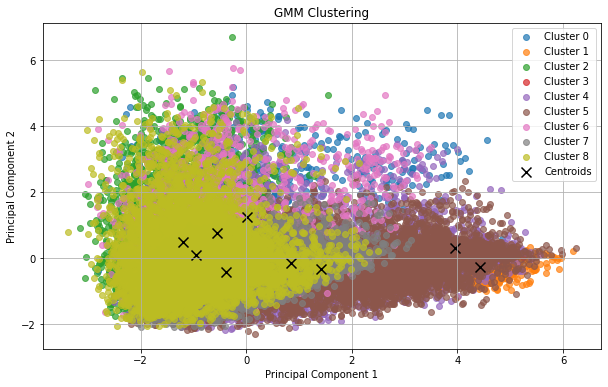

In [19]:
#Show the Clustering 

# Drop non-numeric columns
X = edited_pred_Music.drop(columns=['artist_name', 'track_name', 'music_genre'])

#Define categorical and numerical features
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = ['mode']

#Define transformers for categorical & numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')), 
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#apply transformers to appropriate columns via ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)
    ])

#preprocess the data
X_processed = preprocessor.fit_transform(X)


#Fit GMM
n_components = 9
gmm = GaussianMixture(n_components=n_components, random_state = 42)
gmm.fit(X_processed)

#get cluster labels
cluster_labels = gmm.predict(X_processed)

#add cluster labels to orig. dataframe
edited_pred_Music['cluster_label'] = cluster_labels

print(edited_pred_Music['cluster_label'].value_counts())

#reduce dimensionality for purposes of visualizing data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_processed)

#plot data with cluster labels
plt.figure(figsize=(10,6))
for cluster_label in range(n_components):
    plt.scatter(X_reduced[cluster_labels == cluster_label, 0],
               X_reduced[cluster_labels == cluster_label, 1],
               label=f'Cluster {cluster_label}', alpha=0.7)

#plot centroids
centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black', s=100, label='Centroids')
plt.title('GMM Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#access principal components
principal_components = pca.components_

#display principal components
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(X.columns):
        print(f"{feature}: {pc[j]}")
    print()
    
#This code shows the contribution of each original 
#feature towards each of the two principal components

Principal Component 1:
acousticness: 0.4684986213213312
danceability: -0.40427174615304196
instrumentalness: 0.4119169950431729
liveness: -0.10579224239801528
loudness: -0.5094853065862268
mode: -0.219110624518369
speechiness: -0.358603792683163
tempo: 0.0034902861304110574
valence: -0.0034902861304110626

Principal Component 2:
acousticness: -0.08058535183408225
danceability: -0.3501393829725925
instrumentalness: -0.08980677659353437
liveness: 0.8146957327850098
loudness: 0.0668768468294364
mode: 0.2941578736598727
speechiness: -0.3288048549505803
tempo: -9.875248588753173e-05
valence: 9.875248588752912e-05



# Compiled Data - Everyone

Here we compile all the datasets together for Monday meeting


In [21]:
# FMA

fma.head()

# TODO: remove any lines that have NaN values for features after merges.

,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842


In [22]:
# Spotify Dataset
spotify_data.head()

,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness
0,Gorillaz*\*Feel Good Inc.,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,-6.679,0.1770,0.008360,0.002330
1,Gorillaz*\*Rhinestone Eyes,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,-5.815,0.0302,0.086900,0.000687
2,Gorillaz*\*New Gold (feat. Tame Impala and Boo...,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,-3.930,0.0522,0.042500,0.046900
3,Gorillaz*\*On Melancholy Hill,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,-5.810,0.0260,0.000015,0.509000
4,Gorillaz*\*Clint Eastwood,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,-8.627,0.1710,0.025300,0.000000


In [23]:
# 500 Greatest Songs of All Time
df_top_500.head()

,Title,Description,Artist,Title*\*Artist
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Bob Dylan,Like a Rolling Stone*\*Bob Dylan
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",The Rolling Stones,(I Can't Get No) Satisfaction'*\*The Rolling S...
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",John Lennon,Imagine*\*John Lennon
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",Marvin Gaye,What's Going On*\*Marvin Gaye
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",Aretha Franklin,Respect*\*Aretha Franklin


In [24]:
# Prediction of Music Genre
new_name_edited_pred_Music.head()

,Title*\*Artist,Artist,Title,Acousticness,Danceability,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Genre
0,Röyksopp's Night Out*\*Röyksopp,Röyksopp,Röyksopp's Night Out,0.00468,0.652,0.79200,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,The Shining Path*\*Thievery Corporation,Thievery Corporation,The Shining Path,0.01270,0.622,0.95000,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Hurricane*\*Dillon Francis,Dillon Francis,Hurricane,0.00306,0.620,0.01180,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Nitro*\*Dubloadz,Dubloadz,Nitro,0.02540,0.774,0.00253,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,Divide & Conquer*\*What So Not,What So Not,Divide & Conquer,0.00465,0.638,0.90900,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [25]:
# find number of rows in each dataset
print("FMA:",len(fma))
print("Spotify:",len(spotify_data))
print("500:",len(df_top_500))
print("Genre:",len(new_name_edited_pred_Music))

print()

# find highest number of rows
max_rows = max(len(fma), len(spotify_data), len(df_top_500), len(new_name_edited_pred_Music))
print("Highest number of rows in any single dataset:", max_rows)

# find total number of rows
total_rows = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print("Total number of rows from all datasets:", total_rows)

FMA: 106574
Spotify: 20594
500: 500
Genre: 41700

Highest number of rows in any single dataset: 106574
Total number of rows from all datasets: 169368


In [26]:
# print column names for each dataset
for each in [fma, spotify_data, df_top_500, new_name_edited_pred_Music]:
    print(each.columns)

Index(['Title*\*Artist', 'Artist', 'Title', 'Album', 'Album Type',
       'Danceability', 'Energy', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness'],
      dtype='object')
Index(['Title*\*Artist', 'Artist', 'Title', 'Album', 'Album Type',
       'Danceability', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness'],
      dtype='object')
Index(['Title', 'Description', 'Artist', 'Title*\*Artist'], dtype='object')
Index(['Title*\*Artist', 'Artist', 'Title', 'Acousticness', 'Danceability',
       'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
       'Tempo', 'Valence', 'Genre'],
      dtype='object')


In [27]:
merged_dataset = pd.DataFrame()

merged_dataset = pd.merge(fma, spotify_data, on=['Title*\*Artist'], how='outer')

#merged_dataset = pd.merge(fma, spotify_data, on='Title*\*Artist', suffixes=('', '_drop'))
#merged_df = merged_dataset[[c for c in merged_dataset.columns if not c.endswith('_drop')]]

#merged_dataset = fma.merge(spotify_data, on='Title*\*Artist').merge(df_top_500, on='Title*\*Artist')

# for each Artist*\*Title in every dataset
#for key in [fma, spotify_data, df_top_500]:
    #print(key['Title*\*Artist'])
    # if the key is not in the merged dataset, add it with all of its features.
    #if key['Title*\*Artist'] not in merged_dataset['Title*\*Artist']:
    #    merged_dataset.append(key)

#merged_dataset = pd.merge(fma, spotify_data, on='Title*\*Artist',how='inner')


merged_dataset.head()

,Title*\*Artist,Artist_x,Title_x,Album_x,Album Type_x,Danceability_x,Energy,Speechiness_x,Acousticness_x,Instrumentalness_x,Liveness,Artist_y,Title_y,Album_y,Album Type_y,Danceability_y,Loudness,Speechiness_y,Acousticness_y,Instrumentalness_y
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(len(merged_dataset))
expected_row_count = len(fma) + len(spotify_data) + len(df_top_500)
print(expected_row_count)
print(expected_row_count - len(merged_dataset))


127168
127668
500


In [29]:
# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)

print(len(merged_dataset))
expected_row_count = len(fma) + len(spotify_data) + len(df_top_500)
print(expected_row_count)
print(expected_row_count - len(merged_dataset))


127168
127668
500


In [30]:
merged_dataset

,Title*\*Artist,Energy,Liveness,Loudness,Artist,Title,Album,Album Type,Danceability,Speechiness,Acousticness,Instrumentalness
0,Food*\*AWOL,NaN,NaN,NaN,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,0.6344762684,0.1776465712,NaN,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.1593100648,0.4166752327,0.0106280683
2,This World*\*AWOL,0.8174611317,0.1058799438,NaN,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.4618181276,0.3744077685,0.0018511032
3,Freeway*\*Kurt Vile,0.7014699916,0.3731433124,NaN,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.1245953419,0.0435668989,0.0006967990
4,Spiritual Level*\*Nicky Cook,0.9245251615,0.1154738842,NaN,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.0329852191,0.9516699648,0.9654270154
...,...,...,...,...,...,...,...,...,...,...,...,...
127163,SICK LEGEND*\*JUST DANCE HARDSTYLE,NaN,NaN,-6.344,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.0328,0.448,0.0
127164,SICK LEGEND*\*SET FIRE TO THE RAIN HARDSTYLE,NaN,NaN,-1.786,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.137,0.028,0.0
127165,SICK LEGEND*\*OUTSIDE HARDSTYLE SPED UP,NaN,NaN,-4.679,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.0647,0.0243,0.0
127166,SICK LEGEND*\*ONLY GIRL HARDSTYLE,NaN,NaN,-4.004,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.419,0.356,0.0184


In [31]:
# Do it again for the new_name_edited_pred_Music dataset


merged_dataset = pd.merge(merged_dataset, new_name_edited_pred_Music, on='Title*\*Artist', how='outer')

# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)

merged_dataset

,Title*\*Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Artist,Title,Danceability,Speechiness,Acousticness,Instrumentalness
0,Food*\*AWOL,NaN,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN,AWOL,Food,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,0.6344762684,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1776465712,NaN,AWOL,Electric Ave,0.6758939853,0.1593100648,0.4166752327,0.0106280683
2,This World*\*AWOL,0.8174611317,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1058799438,NaN,AWOL,This World,0.5286430621,0.4618181276,0.3744077685,0.0018511032
3,Freeway*\*Kurt Vile,0.7014699916,Constant Hitmaker,Album,NaN,NaN,NaN,NaN,0.3731433124,NaN,Kurt Vile,Freeway,0.7455658702,0.1245953419,0.0435668989,0.0006967990
4,Spiritual Level*\*Nicky Cook,0.9245251615,Niris,Album,NaN,NaN,NaN,NaN,0.1154738842,NaN,Nicky Cook,Spiritual Level,0.6581786543,0.0329852191,0.9516699648,0.9654270154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168852,So Good at Being in Trouble*\*Unknown Mortal O...,NaN,NaN,NaN,Major,103.816,0.594,Hip-Hop,0.119,-10.136,Unknown Mortal Orchestra,So Good at Being in Trouble,0.829,0.0515,0.0363,0.878
168853,Barbie Doll*\*Night Lovell,NaN,NaN,NaN,Major,99.988,0.629,Hip-Hop,0.296,-7.195,Night Lovell,Barbie Doll,0.849,0.0516,0.133,0.000008
168854,Drama (feat. Drake)*\*Roy Woods,NaN,NaN,NaN,Major,122.04299999999999,0.113,Hip-Hop,0.109,-9.814,Roy Woods,Drama (feat. Drake),0.709,0.055,0.157,0.0
168855,Lovin' Me (feat. Smiggz)*\*Berner,NaN,NaN,NaN,Major,131.079,0.395,Hip-Hop,0.143,-5.443,Berner,Lovin' Me (feat. Smiggz),0.693,0.146,0.00597,0.0


In [32]:
# And again for the 500 Greatest Songs of All Time dataset

merged_dataset = pd.merge(merged_dataset, df_top_500, on='Title*\*Artist', how='outer')

# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)

merged_dataset

,Title*\*Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
0,Food*\*AWOL,NaN,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWOL,Food
1,Electric Ave*\*AWOL,0.6344762684,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1776465712,NaN,0.6758939853,0.1593100648,0.4166752327,0.0106280683,NaN,AWOL,Electric Ave
2,This World*\*AWOL,0.8174611317,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1058799438,NaN,0.5286430621,0.4618181276,0.3744077685,0.0018511032,NaN,AWOL,This World
3,Freeway*\*Kurt Vile,0.7014699916,Constant Hitmaker,Album,NaN,NaN,NaN,NaN,0.3731433124,NaN,0.7455658702,0.1245953419,0.0435668989,0.0006967990,NaN,Kurt Vile,Freeway
4,Spiritual Level*\*Nicky Cook,0.9245251615,Niris,Album,NaN,NaN,NaN,NaN,0.1154738842,NaN,0.6581786543,0.0329852191,0.9516699648,0.9654270154,NaN,Nicky Cook,Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169280,Heroin*\*The Velvet Underground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin
169281,Leader of the Pack*\*The Shangri-Las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack
169282,Pressure Drop*\*Toots and the Maytals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop
169283,Come As You Are*\*Nirvana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""It's just about people and what they're expec...",Nirvana,Come As You Are


In [33]:
final_expected_row_count = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print(final_expected_row_count)

print(len(merged_dataset))

169368
169285


In [34]:
# Drop all rows that have NaN values for every feature
key_features = ['Mode', 'Tempo', 'Valence', 'Genre', 'Liveness', 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Description']

merged_dataset = merged_dataset.dropna(how='all', subset=key_features)
merged_dataset

,Title*\*Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
1,Electric Ave*\*AWOL,0.6344762684,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1776465712,NaN,0.6758939853,0.1593100648,0.4166752327,0.0106280683,NaN,AWOL,Electric Ave
2,This World*\*AWOL,0.8174611317,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1058799438,NaN,0.5286430621,0.4618181276,0.3744077685,0.0018511032,NaN,AWOL,This World
3,Freeway*\*Kurt Vile,0.7014699916,Constant Hitmaker,Album,NaN,NaN,NaN,NaN,0.3731433124,NaN,0.7455658702,0.1245953419,0.0435668989,0.0006967990,NaN,Kurt Vile,Freeway
4,Spiritual Level*\*Nicky Cook,0.9245251615,Niris,Album,NaN,NaN,NaN,NaN,0.1154738842,NaN,0.6581786543,0.0329852191,0.9516699648,0.9654270154,NaN,Nicky Cook,Spiritual Level
5,Where is your Love?*\*Nicky Cook,0.5604099311,Niris,Album,NaN,NaN,NaN,NaN,0.0965666940,NaN,0.5132380502,0.5255193792,0.4522173071,0.0194426943,NaN,Nicky Cook,Where is your Love?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169280,Heroin*\*The Velvet Underground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin
169281,Leader of the Pack*\*The Shangri-Las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack
169282,Pressure Drop*\*Toots and the Maytals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop
169283,Come As You Are*\*Nirvana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""It's just about people and what they're expec...",Nirvana,Come As You Are


In [35]:
# Move "Artist" and "Title" columns to the second index
merged_dataset = merged_dataset.reindex(columns=['Title*\*Artist', 'Title', 'Artist'] + merged_dataset.columns.tolist()[1:])
merged_dataset

,Title*\*Artist,Title,Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
1,Electric Ave*\*AWOL,Electric Ave,AWOL,0.6344762684,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1776465712,NaN,0.6758939853,0.1593100648,0.4166752327,0.0106280683,NaN,AWOL,Electric Ave
2,This World*\*AWOL,This World,AWOL,0.8174611317,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,0.1058799438,NaN,0.5286430621,0.4618181276,0.3744077685,0.0018511032,NaN,AWOL,This World
3,Freeway*\*Kurt Vile,Freeway,Kurt Vile,0.7014699916,Constant Hitmaker,Album,NaN,NaN,NaN,NaN,0.3731433124,NaN,0.7455658702,0.1245953419,0.0435668989,0.0006967990,NaN,Kurt Vile,Freeway
4,Spiritual Level*\*Nicky Cook,Spiritual Level,Nicky Cook,0.9245251615,Niris,Album,NaN,NaN,NaN,NaN,0.1154738842,NaN,0.6581786543,0.0329852191,0.9516699648,0.9654270154,NaN,Nicky Cook,Spiritual Level
5,Where is your Love?*\*Nicky Cook,Where is your Love?,Nicky Cook,0.5604099311,Niris,Album,NaN,NaN,NaN,NaN,0.0965666940,NaN,0.5132380502,0.5255193792,0.4522173071,0.0194426943,NaN,Nicky Cook,Where is your Love?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169280,Heroin*\*The Velvet Underground,Heroin,The Velvet Underground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin
169281,Leader of the Pack*\*The Shangri-Las,Leader of the Pack,The Shangri-Las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack
169282,Pressure Drop*\*Toots and the Maytals,Pressure Drop,Toots and the Maytals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop
169283,Come As You Are*\*Nirvana,Come As You Are,Nirvana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""It's just about people and what they're expec...",Nirvana,Come As You Are


In [36]:
final_expected_row_count = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print(final_expected_row_count)

print(len(merged_dataset))

169368
75846


In [37]:
merged_dataset.dtypes

Title*\*Artist       object
Title                object
Artist               object
Energy               object
Album                object
Album Type           object
Mode                 object
Tempo                object
Valence             float64
Genre                object
Liveness             object
Loudness            float64
Danceability         object
Speechiness          object
Acousticness         object
Instrumentalness     object
Description          object
Artist               object
Title                object
dtype: object

In [38]:
# Create a boolean mask where True indicates the presence of a '?'
mask = merged_dataset.applymap(lambda x: x == '?')

# Find columns with at least one '?'
columns_with_question_mark = mask.any(axis=0)
print("Columns with '?':")
print(columns_with_question_mark)

# Find rows with at least one '?'
rows_with_question_mark = mask.any(axis=1)
print("\nRows with '?':")
print(rows_with_question_mark)

# Optionally, if you want to see the actual rows
print("\nActual rows with '?':")
print(merged_dataset[rows_with_question_mark])

Columns with '?':
Title*\*Artist      False
Title               False
Artist              False
Energy              False
Album                True
Album Type          False
Mode                False
Tempo                True
Valence             False
Genre               False
Liveness            False
Loudness            False
Danceability        False
Speechiness         False
Acousticness        False
Instrumentalness    False
Description         False
Artist              False
Title               False
dtype: bool

Rows with '?':
1         False
2         False
3         False
4         False
5         False
          ...  
169280    False
169281    False
169282    False
169283    False
169284    False
Length: 75846, dtype: bool

Actual rows with '?':
                             Title*\*Artist                    Title  \
45799             Sun Medallion*\*King Tuff            Sun Medallion   
123701                  XXXTENTACION*\*Hope                     Hope   
123704            

/tmp/ipykernel_955/3202172537.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = merged_dataset.applymap(lambda x: x == '?')


In [39]:
merged_dataset['Mode'].value_counts()

Mode
Major    26819
Minor    14890
Name: count, dtype: int64

In [40]:
merged_dataset['Genre'].value_counts()

Genre
Electronic     4854
Anime          4834
Classical      4815
Jazz           4453
Country        4431
Alternative    4355
Blues          4233
Rap            4055
Rock           3071
Hip-Hop        2608
Name: count, dtype: int64

In [41]:
merged_dataset['Tempo'].value_counts()

Tempo
?                     4198
100.014                 15
120.0                   15
140.007                 14
120.006                 13
                      ... 
158.013                  1
121.43799999999999       1
107.96                   1
132.137                  1
99.20100000000001        1
Name: count, Length: 27231, dtype: int64

In [42]:
merged_dataset['Loudness'].value_counts()

Loudness
-7.818     32
-7.768     22
-5.947     21
-4.501     20
-5.077     19
           ..
-23.504     1
-19.953     1
-20.559     1
-16.179     1
-13.652     1
Name: count, Length: 19306, dtype: int64

In [43]:
merged_dataset['Mode'] = merged_dataset['Mode'].map({'Major': 1., 'Minor': 0.}).fillna(-1.)

merged_dataset['Genre'] = merged_dataset['Genre'].map({'Alternative': 0., 'Anime': 1., 'Blues': 2., 'Classical': 3., 'Country': 4, 'Electronic': 5., 'Hip-Hop': 6., 'Jazz': 7., 'Rap': 8., 'Rock': 9.}).fillna(-1.)

merged_dataset['Tempo'] = merged_dataset['Tempo'].replace('?', np.nan)


merged_dataset['Genre'].value_counts()


Genre
-1.0    34137
 5.0     4854
 1.0     4834
 3.0     4815
 7.0     4453
 4.0     4431
 0.0     4355
 2.0     4233
 8.0     4055
 9.0     3071
 6.0     2608
Name: count, dtype: int64

In [44]:
merged_dataset['Tempo'] = merged_dataset['Tempo'].astype(float)
# merged_dataset['Tempo'].value_counts()
merged_dataset['Liveness'] = merged_dataset['Liveness'].astype(float)

merged_dataset['Danceability'] = merged_dataset['Danceability'].astype(float)
merged_dataset['Speechiness'] = merged_dataset['Speechiness'].astype(float)
merged_dataset['Acousticness'] = merged_dataset['Acousticness'].astype(float)
merged_dataset['Instrumentalness'] = merged_dataset['Instrumentalness'].astype(float)


In [45]:
merged_dataset['Tempo'].mean()

119.89926506891312

In [46]:
# does the negative mean negative gain like (-5 dB) , it could mean that its quieter when compared with like a baseline level
merged_dataset['Valence'].mean(), merged_dataset['Liveness'].mean(), merged_dataset['Loudness'].mean(), merged_dataset['Danceability'].mean(), merged_dataset['Speechiness'].mean(), merged_dataset['Acousticness'].mean(), merged_dataset['Instrumentalness'].mean() 

(0.45279205207509166,
 0.1931393886911624,
 -8.871550182174213,
 0.557986909858856,
 0.09319608336078379,
 0.3492405658534801,
 0.2391526463730259)

In [47]:
# split into 2 datatsets one has all genre values as null...and use that as a test set

# Filter the DataFrame based on the condition
merged_dataset_test = merged_dataset[merged_dataset['Genre'] == -1.]

# Display the filtered DataFrame
merged_dataset_test['Genre'].value_counts()

merged_dataset_train = merged_dataset[merged_dataset['Genre'] != -1.]
merged_dataset_train['Genre'].value_counts()
#merged_dataset_test.iloc[:]
merged_dataset_test[16200:169284]

,Title*\*Artist,Title,Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
109649,Kidz Bop Kids*\*Savage Love,Savage Love,Kidz Bop Kids,NaN,KIDZ BOP 2021,album,-1.0,NaN,NaN,-1.0,NaN,-6.042,0.597,0.0807,0.13300,0.000012,NaN,Kidz Bop Kids,Savage Love
109650,Kidz Bop Kids*\*Levitating,Levitating,Kidz Bop Kids,NaN,KIDZ BOP 2022,album,-1.0,NaN,NaN,-1.0,NaN,-5.321,0.689,0.0373,0.00435,0.005750,NaN,Kidz Bop Kids,Levitating
109651,Kidz Bop Kids*\*Dance Monkey,Dance Monkey,Kidz Bop Kids,NaN,KIDZ BOP Party Playlist!,album,-1.0,NaN,NaN,-1.0,NaN,-5.395,0.794,0.1040,0.16600,0.000002,NaN,Kidz Bop Kids,Dance Monkey
109652,Kidz Bop Kids*\*Enemy,Enemy,Kidz Bop Kids,NaN,KIDZ BOP Super POP!,album,-1.0,NaN,NaN,-1.0,NaN,-5.050,0.596,0.0713,0.03890,0.000000,NaN,Kidz Bop Kids,Enemy
109653,Kidz Bop Kids*\*Good 4 U,Good 4 U,Kidz Bop Kids,NaN,KIDZ BOP 2022,album,-1.0,NaN,NaN,-1.0,NaN,-5.217,0.559,0.1380,0.00888,0.000079,NaN,Kidz Bop Kids,Good 4 U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169280,Heroin*\*The Velvet Underground,Heroin,The Velvet Underground,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin
169281,Leader of the Pack*\*The Shangri-Las,Leader of the Pack,The Shangri-Las,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack
169282,Pressure Drop*\*Toots and the Maytals,Pressure Drop,Toots and the Maytals,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop
169283,Come As You Are*\*Nirvana,Come As You Are,Nirvana,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,"""It's just about people and what they're expec...",Nirvana,Come As You Are


In [48]:
lessNaNs = merged_dataset_train.dropna(subset=['Loudness', 'Danceability','Speechiness', 'Acousticness', 'Instrumentalness'])
lessNaNs

,Title*\*Artist,Title,Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
1938,Dead Moon Night*\*Dead Moon,Dead Moon Night,Dead Moon,0.4422356050,Live at WFMU on Joe Belock's Show on 9/27/2001,Radio Program,1.0,155.693,0.434,2.0,0.643578,-7.358,0.527776,0.041858,0.977386,0.683240,NaN,Dead Moon,Dead Moon Night
5906,Discipline*\*Nine Inch Nails,Discipline,Nine Inch Nails,0.938086,The Slip,Album,1.0,122.010,0.824,0.0,0.128478,-6.646,0.736154,0.036836,0.329086,0.619240,NaN,Nine Inch Nails,Discipline
6282,One Big Holiday*\*My Morning Jacket,One Big Holiday,My Morning Jacket,0.848291,The WIRED CD: Rip. Sample. Mash. Share.,Album,0.0,136.850,0.313,0.0,0.094558,-7.036,0.711363,0.344707,0.291161,0.910738,NaN,My Morning Jacket,One Big Holiday
12077,Agoraphobia*\*Deerhunter,Agoraphobia,Deerhunter,0.49359,Deerhunter Live at ATP-NY 2009 on WFMU,Live Performance,1.0,120.097,0.401,0.0,0.143736,-6.890,0.351749,0.031258,0.599628,0.633114,NaN,Deerhunter,Agoraphobia
45067,Traveling Alone*\*Tift Merritt,Traveling Alone,Tift Merritt,NaN,Live at WFMU on Shrunken Planet with Jeffrey D...,Radio Program,1.0,80.529,0.227,0.0,0.102000,-11.033,0.509000,0.040400,0.850000,0.000268,NaN,Tift Merritt,Traveling Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168862,So Good at Being in Trouble*\*Unknown Mortal O...,So Good at Being in Trouble,Unknown Mortal Orchestra,NaN,NaN,NaN,1.0,103.816,0.594,6.0,0.119000,-10.136,0.829000,0.051500,0.036300,0.878000,NaN,Unknown Mortal Orchestra,So Good at Being in Trouble
168863,Barbie Doll*\*Night Lovell,Barbie Doll,Night Lovell,NaN,NaN,NaN,1.0,99.988,0.629,6.0,0.296000,-7.195,0.849000,0.051600,0.133000,0.000008,NaN,Night Lovell,Barbie Doll
168864,Drama (feat. Drake)*\*Roy Woods,Drama (feat. Drake),Roy Woods,NaN,NaN,NaN,1.0,122.043,0.113,6.0,0.109000,-9.814,0.709000,0.055000,0.157000,0.000000,NaN,Roy Woods,Drama (feat. Drake)
168865,Lovin' Me (feat. Smiggz)*\*Berner,Lovin' Me (feat. Smiggz),Berner,NaN,NaN,NaN,1.0,131.079,0.395,6.0,0.143000,-5.443,0.693000,0.146000,0.005970,0.000000,NaN,Berner,Lovin' Me (feat. Smiggz)


In [49]:
test_lessNaNs = merged_dataset_test.dropna(subset=['Loudness', 'Danceability','Speechiness', 'Acousticness', 'Instrumentalness'])
#test_lessNaNs[521:530]

# EDA - TBD




In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data with variables: artist_name, track_name, acousticness, danceability, instrumentalness, 
# liveness, loudness, mode, speechiness, tempo, valence, and music_genre
# Assume you have a dataset named 'songs_data.csv'

# Extract features and target variable
# key_features = ['Mode', 'Tempo', 'Valence', 'Genre', 'Liveness', 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Description']


#X = merged_dataset_train[['Mode', 'Tempo', 'Valence', 'Liveness', 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
X = lessNaNs[[ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
y = lessNaNs['Genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_test = merged_dataset_test[[ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
#y_test = merged_dataset_test['Genre']
#X_train = X
#y_train = y

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the genre of songs in the test set
predictions = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Now we used this trained classifier to predict the genre of new songs by providing the respective features

# "Paint it black" yields 9 (rock) which makes sense:
#new_song_features = [[ -9.267, 0.464, 0.0926,  0.0493, 0.002440]] 

variables_of_interest = [ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']
row_index = input("Enter the row you want: ")

row_index = int(row_index)
# code: 106974 --> Pepas (Rap)

selected_values = test_lessNaNs.loc[row_index, variables_of_interest]

new_song_features = [selected_values.tolist()]
  
#new_song_features = [[ -9.267, 0.464, 0.0926,  0.0493, 0.002440]]  # Example feature values for "Paint it Black"
predicted_genre = clf.predict(new_song_features)

print("Predicted Genre:", predicted_genre)

reverse_mapping = {0.0: 'Alternative', 1.0: 'Anime', 2.0: 'Blues', 3.0: 'Classical', 4.0: 'Country', 5.0: 'Electronic', 6.0: 'Hip-Hop', 7.0: 'Jazz', 8.0: 'Rap', 9.0: 'Rock', -1.0: 'Unknown'}
test_lessNaNs['Genre'] = test_lessNaNs['Genre'].map(reverse_mapping)


# Iterate over the dictionary keys
for key in reverse_mapping:
    # Check if the current key matches the user input key
    if key == predicted_genre:
        # Assign the value associated with the matching key to the variable
        value_for_key = reverse_mapping[key]
        # Break the loop since we found the appropriate value
        break

# Check if the value for the user input key was found
if value_for_key is not None:
    print(f"The value for key '{predicted_genre}' is '{value_for_key}'")
else:
    print(f"The key '{predicted_genre}' does not exist in the dictionary")

Accuracy: 0.9928074802205706
Enter the row you want: 106974
Predicted Genre: [8]
The value for key '[8]' is 'Rap'


In [139]:
merged_dataset_train.shape, merged_dataset_test.shape

((41709, 19), (34137, 19))

In [140]:
#X_test = merged_dataset_test[['Mode', 'Tempo', 'Valence', 'Liveness', 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
#X_test = merged_dataset_test[[ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
#y_test = merged_dataset_test['Genre']

predictions_test = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
#accuracy_test = accuracy_score(y_test, predictions_test)
#print("Accuracy on Test Set:", accuracy_test)

In [141]:
lessNaNs

,Title*\*Artist,Title,Artist,Energy,Album,Album Type,Mode,Tempo,Valence,Genre,Liveness,Loudness,Danceability,Speechiness,Acousticness,Instrumentalness,Description,Artist,Title
1938,Dead Moon Night*\*Dead Moon,Dead Moon Night,Dead Moon,0.4422356050,Live at WFMU on Joe Belock's Show on 9/27/2001,Radio Program,1.0,155.693,0.434,6,0.643578,-7.358,0.527776,0.041858,0.977386,0.683240,NaN,Dead Moon,Dead Moon Night
5906,Discipline*\*Nine Inch Nails,Discipline,Nine Inch Nails,0.938086,The Slip,Album,1.0,122.010,0.824,6,0.128478,-6.646,0.736154,0.036836,0.329086,0.619240,NaN,Nine Inch Nails,Discipline
6282,One Big Holiday*\*My Morning Jacket,One Big Holiday,My Morning Jacket,0.848291,The WIRED CD: Rip. Sample. Mash. Share.,Album,0.0,136.850,0.313,6,0.094558,-7.036,0.711363,0.344707,0.291161,0.910738,NaN,My Morning Jacket,One Big Holiday
12077,Agoraphobia*\*Deerhunter,Agoraphobia,Deerhunter,0.49359,Deerhunter Live at ATP-NY 2009 on WFMU,Live Performance,1.0,120.097,0.401,6,0.143736,-6.890,0.351749,0.031258,0.599628,0.633114,NaN,Deerhunter,Agoraphobia
45067,Traveling Alone*\*Tift Merritt,Traveling Alone,Tift Merritt,NaN,Live at WFMU on Shrunken Planet with Jeffrey D...,Radio Program,1.0,80.529,0.227,5,0.102000,-11.033,0.509000,0.040400,0.850000,0.000268,NaN,Tift Merritt,Traveling Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168862,So Good at Being in Trouble*\*Unknown Mortal O...,So Good at Being in Trouble,Unknown Mortal Orchestra,NaN,NaN,NaN,1.0,103.816,0.594,6,0.119000,-10.136,0.829000,0.051500,0.036300,0.878000,NaN,Unknown Mortal Orchestra,So Good at Being in Trouble
168863,Barbie Doll*\*Night Lovell,Barbie Doll,Night Lovell,NaN,NaN,NaN,1.0,99.988,0.629,0,0.296000,-7.195,0.849000,0.051600,0.133000,0.000008,NaN,Night Lovell,Barbie Doll
168864,Drama (feat. Drake)*\*Roy Woods,Drama (feat. Drake),Roy Woods,NaN,NaN,NaN,1.0,122.043,0.113,5,0.109000,-9.814,0.709000,0.055000,0.157000,0.000000,NaN,Roy Woods,Drama (feat. Drake)
168865,Lovin' Me (feat. Smiggz)*\*Berner,Lovin' Me (feat. Smiggz),Berner,NaN,NaN,NaN,1.0,131.079,0.395,0,0.143000,-5.443,0.693000,0.146000,0.005970,0.000000,NaN,Berner,Lovin' Me (feat. Smiggz)


In [142]:
#Show the Clustering on the less NaNs Dataset 

#Define categorical and numerical features
#numeric_features = lessNaNs.select_dtypes(include=['float64']).columns.tolist()

#desired_labels_for_gmm = lessNaNs[[ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
genre_sub_variables = [0.,1.,2.,3.,4.,5.,6.,7.,8.,9.] #these are float 
subvar_loudness_pair = [(genre, loudness) for genre in genre_sub_variables for loudness in lessNaNs['Loudness']]
data = pd.DataFrame(subvar_loudness_pair, columns = ['Genre', 'Loudness'])

desired_labels_for_gmm = lessNaNs[['Genre', 'Loudness']]


#X_to_drop = lessNaNs.drop(columns=['Title*\*Artist', 'Title', 'Artist', 'Energy', 'Album',
                           #'Album Type', 'Tempo', 'Valence', 'Genre'])

#numeric_features = X_to_drop.columns.tolist()
#categorical_features = ['Mode']


#Define transformers for categorical & numerical features
#numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy = 'mean')), 
    #('scaler', StandardScaler())
#])


#categorical_transformer = Pipeline(steps= [
   # ('imputer', SimpleImputer(strategy='most_frequent')),
   # ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

#apply transformers to appropriate columns via ColumnTransformer
#preprocessor = ColumnTransformer(
    #transformers=[
       # ('num', numeric_transformer, numeric_features), 
        #('cat', categorical_transformer, categorical_features)
   # ])

#preprocess the data
#X_processed = preprocessor.fit_transform(X_to_drop)


#Fit GMM
n_components = 10
gmm = GaussianMixture(covariance_type='full', n_components=n_components, random_state = 42)
gmm.fit(data[['Genre']])

#get cluster labels
cluster_labels = gmm.predict(data[['Genre']])

#add cluster labels to orig. dataframe
#lessNaNs['Genre'] = cluster_labels
data['Cluster'] = cluster_labels

#print(lessNaNs['Genre'].value_counts())
print(data)


print("Means clusters", gmm.means_)
print("covariance of clusters", gmm.covariances_)
print("weights of clusters: ", gmm.weights_)
print("converged: ", gmm.converged_)
print("number of iterations", gmm.n_iter_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4b6796fc10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


        Genre  Loudness  Cluster
0         0.0    -7.358        2
1         0.0    -6.646        2
2         0.0    -7.036        2
3         0.0    -6.890        2
4         0.0   -11.033        2
...       ...       ...      ...
417085    9.0   -10.136        7
417086    9.0    -7.195        7
417087    9.0    -9.814        7
417088    9.0    -5.443        7
417089    9.0   -13.652        7

[417090 rows x 3 columns]
Means clusters [[3.]
 [8.]
 [0.]
 [6.]
 [2.]
 [5.]
 [1.]
 [9.]
 [4.]
 [7.]]
covariance of clusters [[[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]]
weights of clusters:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
converged:  True
number of iterations 2


In [143]:
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
#import warnings 
#warnings.filterwarnings("ignore") #to ignore all warnings 

In [158]:
# #reduce dimensionality for purposes of visualizing data
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(desired_labels_for_gmm)

# #plot data with cluster labels
# plt.figure(figsize=(10,6))
# for cluster_labels in range(n_components):
#     plt.scatter(X_reduced[cluster_labels == cluster_labels, 0],
#                X_reduced[cluster_labels == cluster_labels, 1],
#                label=f'Cluster {cluster_labels}', alpha=0.7)

# #plot centroids
# centroids = pca.transform(gmm.means_)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black', s=100, label='Centroids')
# plt.title('GMM Clustering')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.grid(True)
# plt.show()



# plt.figure(figsize = (10,6))
# for cluster_label in set(cluster_labels):
#     plt.scatter(data[data['Cluster'] == cluster_label]['Loudness'], 
#                 [genre_sub_variables.index(g) for g in data[data['Cluster']== cluster_label]['Genre']],
#                label =f'Cluster {cluster_label}')
# plt.title('GMM Clustering Result')
# plt.xlabel("Loudness")
# plt.ylabel("Genre SubVar")
# plt.legend()
# plt.grid(True)
# plt.show()     





# # Plotting the scatter plot
# plt.figure(figsize=(10, 6))
# for cluster_id in range(n_components):
#     cluster_data = data[data['Cluster'] == cluster_id]
#     plt.scatter(cluster_data['Genre'], cluster_data['Cluster'], label=f'Cluster {cluster_id}', alpha=0.5)

# plt.xlabel('Genre')
# plt.ylabel('Cluster')
# plt.title('Cluster Visualization')
# plt.legend()
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


# Reduce dimensionality for visualization
pca = PCA(n_components=0.2)
X_reduced = pca.fit_transform(data[['Genre']])

# Plot data with cluster labels
plt.figure(figsize=(10, 6))
for cluster_labels in range(n_components):
    plt.scatter(X_reduced[data['Cluster'] == cluster_labels, 0],
                X_reduced[data['Cluster'] == cluster_labels, 1],
                label=f'Cluster {cluster_labels}', alpha=0.7)

# Plot centroids
centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('GMM Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 720x432 with 0 Axes>

In [151]:
n_components

10

# Program - TBD

# Footnotes
1. <a name="cite_note-1"></a> [^](#cite_ref-1) Chillar, Snigdha et al. (May 2019) Music Genre Classification using Machine Learning Algorithms: A comparison. *International Research Journal of Engineering and Technology (IRJET)*. https://d1wqtxts1xzle7.cloudfront.net/59934287/IRJET-V6I517420190704-120568-1u4iafr-libre.pdf?1562308085=&response-content-disposition=inline%3B+filename%3DIRJET_Music_Genre_Classification_using_M.pdf&Expires=1708407619&Signature=WRJ6JnCTvv8fyWmo~A-SzVQ2DRT77pSZFX8tmlz7YCCB7J5ZMkrJpugkiwlJT7DoaCR-d2jI6IfGjgYXI9-EsJlVANQ~gJY04gUz9H4zkZG-HiyimSeXcAkK58Rqp06qgvlu-yx5zcM1wNxrnhgASBQEvVBkhyQMxETbkgtLYzw40gKVZFeioo0Qjj7aqC-YDzGwlzlnXhNss4xlBsBj7PdyTFgGu2cM8ky8g3XsqA1yIIuiO4cr0SEcCJU8orRATVTpB388Nud0GvNiGOz6DAhpoCBLEqrsYxFHk2jOut7x1TPs91ECXgG1SwjPE03vlYoeAMEkdV5pasBm1yZDeQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Bahuleyan, Hareesh( 3 April 2018) Music Genre Classification using Machine Learning Techniques. Cornell University. https://doi.org/10.48550/arXiv.1804.01149

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Wohlwend, Brandon (23 July 2023) Decision Tree, Random Forest, and XGBoost: An Exploration into the Heart of Machine Learning. Medium. https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948#:~:text=Random%20Forests%20build%20on%20this,that%20often%20outperforms%20many%20others.
